In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def create_model1():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(len(np.unique(y_train)), activation='softmax')
    ])
    model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def create_model2():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(len(np.unique(y_train)), activation='softmax')
    ])
    model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [1]:
import os

# Set the root directory
root_dir = r'C:\Users\kowsh\Desktop\main project\dataset\plantVillageDataset'

# List all immediate subdirectories (class names)
class_names = [dirname for dirname in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, dirname))]

# Print the class names
for class_name in class_names:
    
    print(class_name)

color
grayscale
segmented


In [2]:
from tqdm import tqdm
from pathlib import Path
import pandas as pd

def data(dataset_path):
    images = []
    labels = []
    dataset_path = Path(dataset_path)
    
    for subfolder in tqdm(dataset_path.iterdir(), desc="Processing Subfolders"):
        if subfolder.is_dir():
            for image_file in subfolder.iterdir():
                if image_file.is_file():
                    images.append(str(image_file))
                    labels.append(subfolder.name)
    
    df = pd.DataFrame({'image': images, 'label': labels})
    return df


In [3]:
color_path = r'C:\Users\kowsh\Desktop\main project\dataset\plantVillageDataset\color'
train_color = data(color_path)
print(train_color.shape)
train_color.label.value_counts().to_frame()
num_classes = train_color['label'].nunique()
print(f"Number of classes: {num_classes}")

Processing Subfolders: 4it [00:01,  3.83it/s]

(3172, 2)
Number of classes: 4


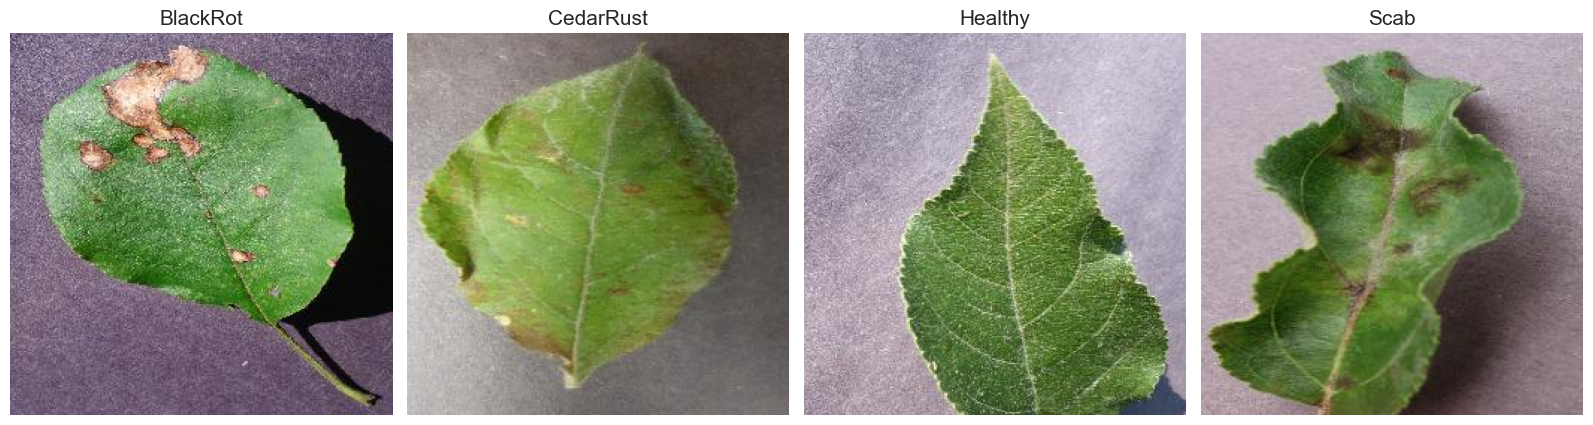

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# List all immediate subdirectories (class names)
class_names = [dirname for dirname in os.listdir(color_path) if os.path.isdir(os.path.join(color_path, dirname))]

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(20, 20))

# Loop through each class
for idx, class_name in enumerate(class_names):
    # Get the path to the class directory
    class_dir = os.path.join(color_path, class_name)
    
    # List all images in the class directory
    image_files = [file for file in os.listdir(class_dir) if file.endswith(('.png', '.jpg', 'JPG', '.jpeg'))]
    
    if not image_files:
        continue  # Skip if no images are found in the class folder
    
    # Randomly select an image
    random_image = np.random.choice(image_files)
    
    # Load the image
    img_path = os.path.join(class_dir, random_image)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Plot the image
    plt.subplot(len(class_names) // 5 + 1, 5, idx + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(class_name, fontsize=15)

plt.tight_layout()
plt.show()

In [5]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras 
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [6]:
X_train, X_test1, y_train, y_test1 = train_test_split(train_color['image'], train_color['label'], test_size=0.2, random_state=42,shuffle=True,stratify=train_color['label'])
X_val, X_test, y_val, y_test = train_test_split(X_test1,y_test1, test_size=0.5, random_state=42,shuffle=True,stratify=y_test1)
df_train = pd.DataFrame({'image': X_train, 'label': y_train})
df_test = pd.DataFrame({'image': X_test, 'label': y_test})
df_val = pd.DataFrame({'image': X_val, 'label': y_val})

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
image_size = (224, 224)
batch_size = 32

# Base ImageDataGenerator for rescaling
datagen = ImageDataGenerator(rescale=1./255)

# Train ImageDataGenerator with Data Augmentation 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create data generators for training, testing, and validation
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical'  # Ensure correct class_mode for multi-class problems
)

test_generator = datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'  # Ensure correct class_mode for multi-class problems
)

val_generator = datagen.flow_from_dataframe(
    dataframe=df_val,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'  # Ensure correct class_mode for multi-class problems
)


Found 2536 validated image filenames belonging to 4 classes.
Found 318 validated image filenames belonging to 4 classes.
Found 317 validated image filenames belonging to 4 classes.


C:\Users\kowsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


In [10]:
import matplotlib.pyplot as plt

def plot_histories(histories):
    for i, history in enumerate(histories):
        plt.figure(figsize=(12, 5))
        
        # Accuracy
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Acc')
        plt.plot(history.history['val_accuracy'], label='Val Acc')
        plt.title(f'Model {i+1} Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Loss
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Val Loss')
        plt.title(f'Model {i+1} Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()



Training Bagging Model 1


Epoch 1/5


80/80 [==============================] - 88s 1s/step - loss: 0.7772 - accuracy: 0.7145 - val_loss: 0.2942 - val_accuracy: 0.9243
Epoch 2/5
80/80 [==============================] - 82s 1s/step - loss: 0.3203 - accuracy: 0.8856 - val_loss: 0.1758 - val_accuracy: 0.9621
Epoch 3/5
80/80 [==============================] - 78s 971ms/step - loss: 0.2337 - accuracy: 0.9156 - val_loss: 0.1461 - val_accuracy: 0.9558
Epoch 4/5
80/80 [==============================] - 77s 959ms/step - loss: 0.1854 - accuracy: 0.9330 - val_loss: 0.1073 - val_accuracy: 0.9653
Epoch 5/5
80/80 [==============================] - 74s 929ms/step - loss: 0.1703 - accuracy: 0.9409 - val_loss: 0.1070 - val_accuracy: 0.9685

Training Bagging Model 2
Epoch 1/5
80/80 [==============================] - 84s 995ms/step - loss: 0.7724 - accuracy: 0.7019 - val_loss: 0.2713 - val_accuracy: 0.9211
Epoch 2/5
80/80 [==============================] - 75s 939ms/step - loss: 0.3422 - accuracy: 0.875

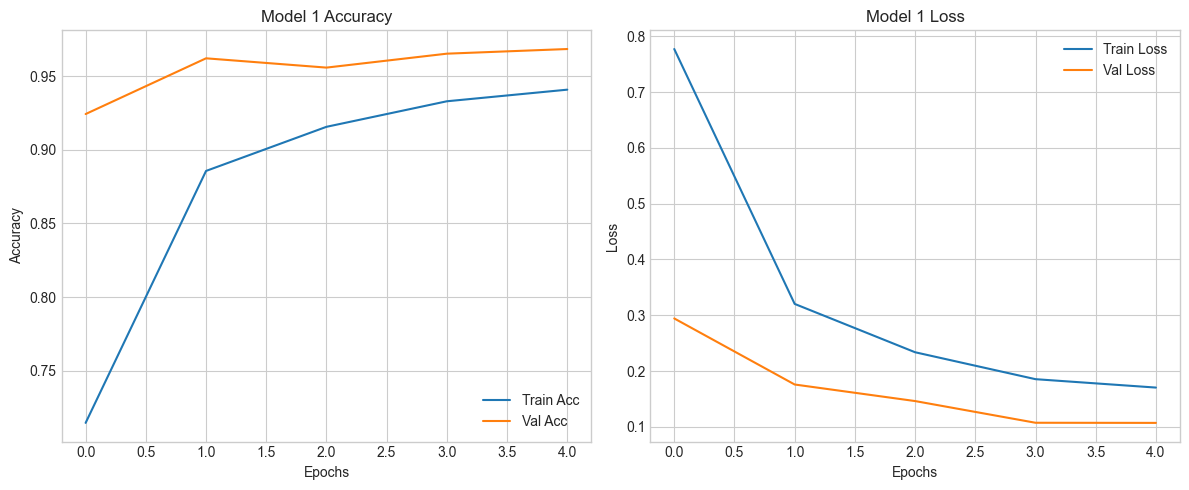

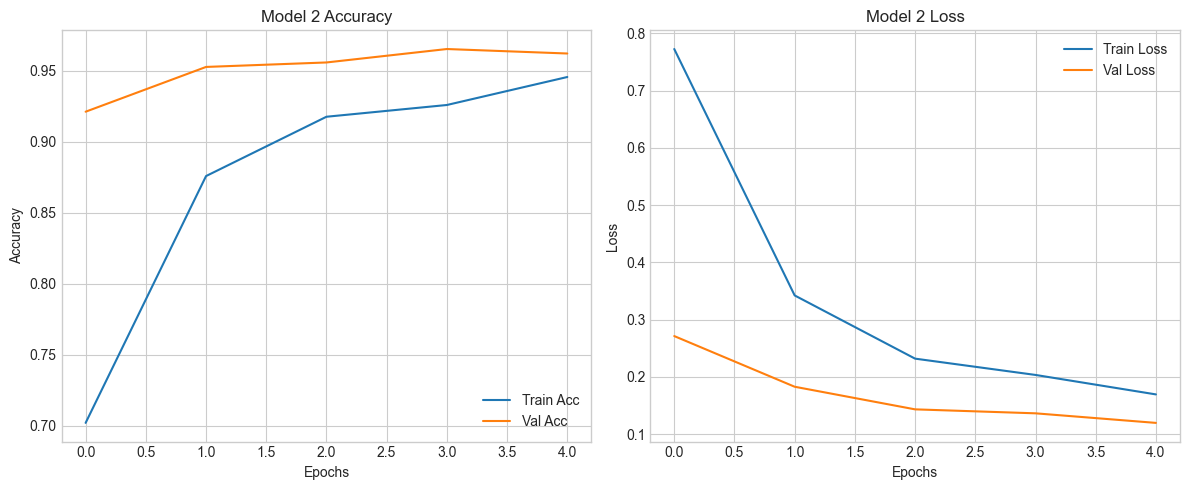

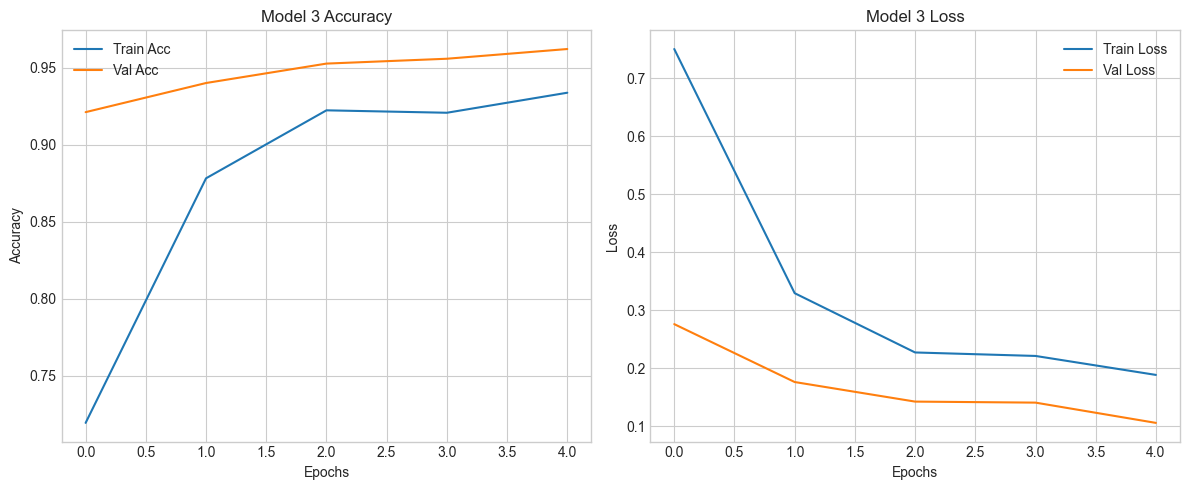


Bagging Ensemble Accuracy: 96.86%

              precision    recall  f1-score   support

    BlackRot       1.00      0.97      0.98        63
   CedarRust       1.00      0.96      0.98        27
     Healthy       0.95      0.99      0.97       165
        Scab       0.97      0.92      0.94        63

    accuracy                           0.97       318
   macro avg       0.98      0.96      0.97       318
weighted avg       0.97      0.97      0.97       318



<Figure size 1000x800 with 0 Axes>

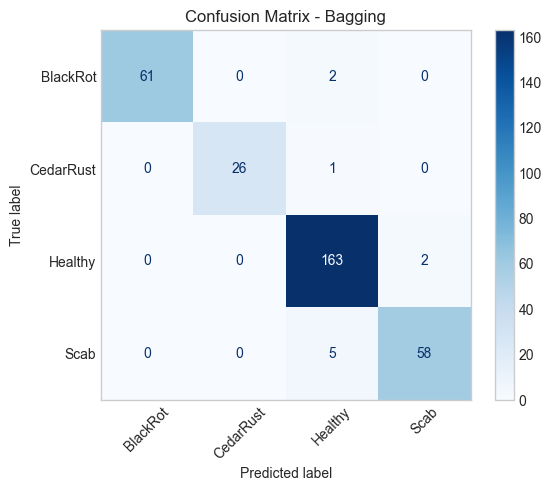

In [11]:
# Train and get histories
bagged_models, bagging_histories = train_bagged_models(n_models=3)

# Plot curves
plot_histories(bagging_histories)

# Final Evaluation
bagging_predict(bagged_models, test_generator)
